##Abstract 
The aim of the experiment to compare two different methods of solving boundary-value problems of ODE. The shooting method showed faster running time than the finite difference method, while precision was the same.

##Introduction
A boundary-value problem is a system of ODE with solution in more than 1 point. The solution for such problems differs from regular one, since the regular nth-order ODE has n required conditions, while a boundary-value problem might no have. The problem of this assignment to solve ODE  $\frac{d^2\!y}{dt^2}+4y=0$  which has solution in more than 1 point,  $y(0)=1$ and $y(\frac{\pi}{4})=5$ . There is no y'(0) in initial conditions, that is why it cannot be solved with regular approach. Therefore, the shooting method and the finite difference method were used to solve it and compared with each other.

##Method 


> **The shooting method**

This method based on converting boundary-value problem into an equivalent initial-value problem. The shooting method can be divided into 5 stages.
1. Converting the high order ODE into system of 1st order ODE's
2. Predict the value of z0
3. Solve ODE with Fourth-Order Runge-Kutta order 4, euler or any other method with initial guess 
4. Re-estimate initial condition of z0 and solve ODE again 
5. Find approximate solution of required accuracy by secant method, as 2 initial guesses can be calculated.




> **The finite difference method**
the finite difference method uses finite difference formulas at evenly spaced interval points to approximate the ODE. 
$$\frac{dy}{dx} = \frac{y_{i+1}-y_{i-1}}{2h}$$
$$\frac{d^2y}{dx^2} = \frac{y_{i+1}-2y_i +y_{i-1}}{h^2}$$
$$AY = b$$
This matrix of linear Algebraic Equations can be solve by Thomas algorithm.







In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.integrate import odeint

In [ ]:
def dzdt(y):
  return -4*y

def f(t): 
  return np.cos(2*t)+5*np.sin(2*t)


In [ ]:
def euler(f, a, b,u, N):
  h = (b-a)/N
  t = np.zeros((N+1,)) # mesh
  y = np.zeros((N+1,))
  z = np.zeros((N+1,))
  t[0] = a
  y[0] = 1
  z[0] = u
  for i in range(1, N+1):
    t[i] = t[0] + i*h
    y[i] = y[i-1] + h*z[i-1]
    z[i] = z[i-1] + f(y[i-1])*h
    
  return y, t

In [ ]:
def G(x):
  y1, t1 = euler(dzdt, 0, math.pi/4, x , 12000)
  return y1[-1]-5

In [ ]:
def secant(G, m0, ml, e):
  G0 = G(m0)
  G1 = G(ml)

  while abs((ml -m0)/ml) > e:
            m = ml - G1*(ml-m0)/(G1 - G0)
            m0 = ml
            ml = m
            G0 = G1
            G1 = G(m)
  return m

In [ ]:
def tm(a, b, c, d, n):
  #a is a array of values of lower diagonal
  #b is a array of values of main diagonal 
  #c is a array of values of upper diagonal
  #d is a right side of system 
  x=np.zeros(n)
  #copy array
  aa, bb, cc, dd = map(np.array, (a,b,c,d)) 
   # elemination 
  for i in range(1, n):
    bb[i] = bb[i] - aa[i-1]/bb[i-1]*cc[i-1]
    dd[i] = dd[i] - aa[i-1]/bb[i-1]*dd[i-1]
  #x[n-1]*b[n-1]=d[n-1]
  x[n-1] = dd[n-1]/bb[n-1]

  #backsubstitution
  for i in range(n-2,-1,-1):
     x[i] = (dd[i]-cc[i]*x[i+1])/bb[i]
     
  return x

In [ ]:
def infin(n):
  h = math.pi/4/n
  A = np.zeros((n+1, n+1))
  A[0, 0] = 1
  A[n, n] = 2-4*h**2
  A[n, n-1] = -1
  for i in range(1, n):
    A[i, i-1] = -1
    A[i, i] = 2-4*h**2
    A[i, i+1] = -1

  k =len(A)

  a = np.zeros(n+1)
  d = np.zeros(n+1)
  c = np.zeros(n+1)
  a[0] = 0
  d[0] = 1
  c[0] = -1
  for i in range(1, n+1):
    a[i] = A[i, i-1]
    d[i] = A[i, i]
  for i in range(1, n):
    c[i] = A[i, i+1]



  b = np.zeros(n+1)
  b[0] = 1
  for i in range(1, n+1):
    b[i] = 0
    b[-1] = 5


  y = tm(c, d, a, b, k)
  t = np.linspace(0, math.pi/4, n+1)
  y[-1] = 5
  
  return y, t


In [ ]:
%%timeit
n = 9000
k = 1
c = 0
while k > 0.0001:
  n +=100
  y1 ,t1 = infin(n)
  c = np.sum((f(t1)-y1)**2)
  k = (c/n)**(1/2)
print(n)

1 loop, best of 5: 5.72 s per loop


In [ ]:
#the finite difference method
%%timeit
y1, t1 = infin(11200)

1 loop, best of 5: 303 ms per loop


In [ ]:
#the shooting method
%%timeit
x = secant(G, 1, 5, 0.0001)
print(X)
y2, t2 = euler(dzdt, 0, math.pi/4, x , 12000)

NameError: ignored

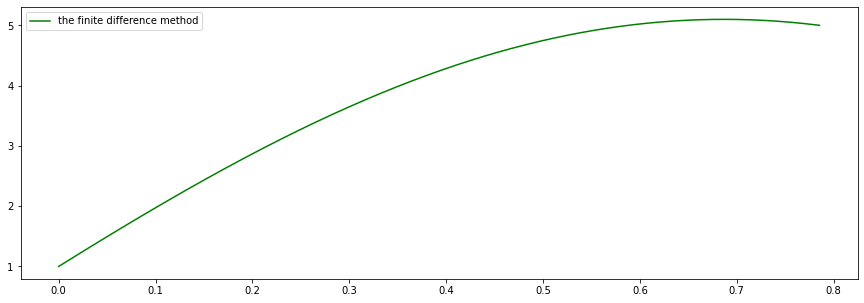

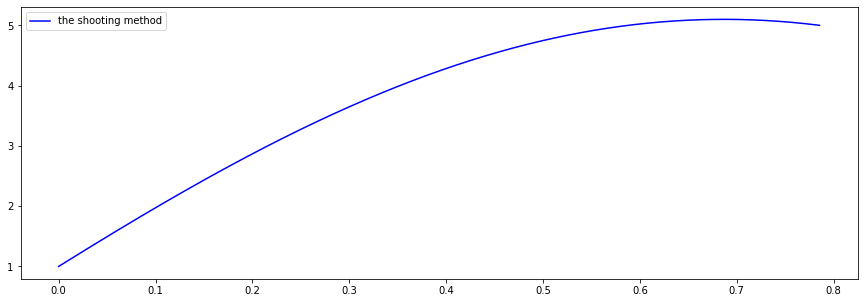

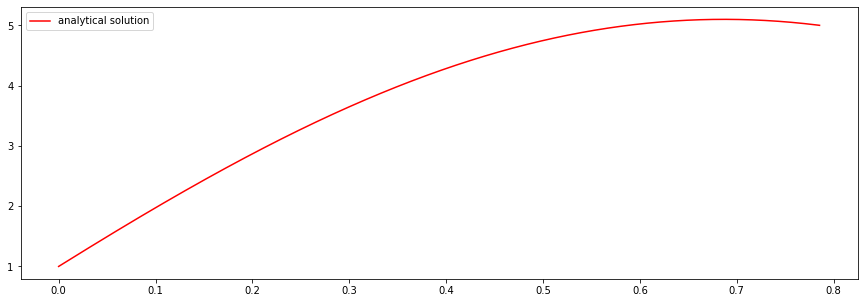

In [ ]:
y1, t1 = infin(11200)
x = secant(G, 1, 5, 0.0001)
y2, t2 = euler(dzdt, 0, math.pi/4, x , 12000)
plt.figure(figsize=(15,5))
plt.plot(t1, y1, c = 'g', label = "the finite difference method")
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
plt.plot(t2, y2, c = 'b', label = "the shooting method")
plt.legend()
plt.show()
plt.figure(figsize=(15,5))
plt.plot(t2, f(t2), c= 'r', label = "analytical solution")
plt.legend()
plt.show()



##Results
Computional cost: 

The shooting method = 131 ms per loop

The finite difference method = 303 ms per loop

##Conclusion

According to the running time, the shooting method showed better result. The shooting method and the finite difference method have the same precision. From my point of view, the finite difference method should be faster, but maybe there is some problem with solving the matrix of linear Algebraic Equations.